# Recommender System With Python
**what is recommender system?**
A recommender system, or a recommendation system (sometimes replacing 'system' with a synonym such as platform or engine), is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item(Francesco Ricci, 2011). 
It is used in variety of fields including entertainment , E-Commerce, open web recommenders and social media platforms. 

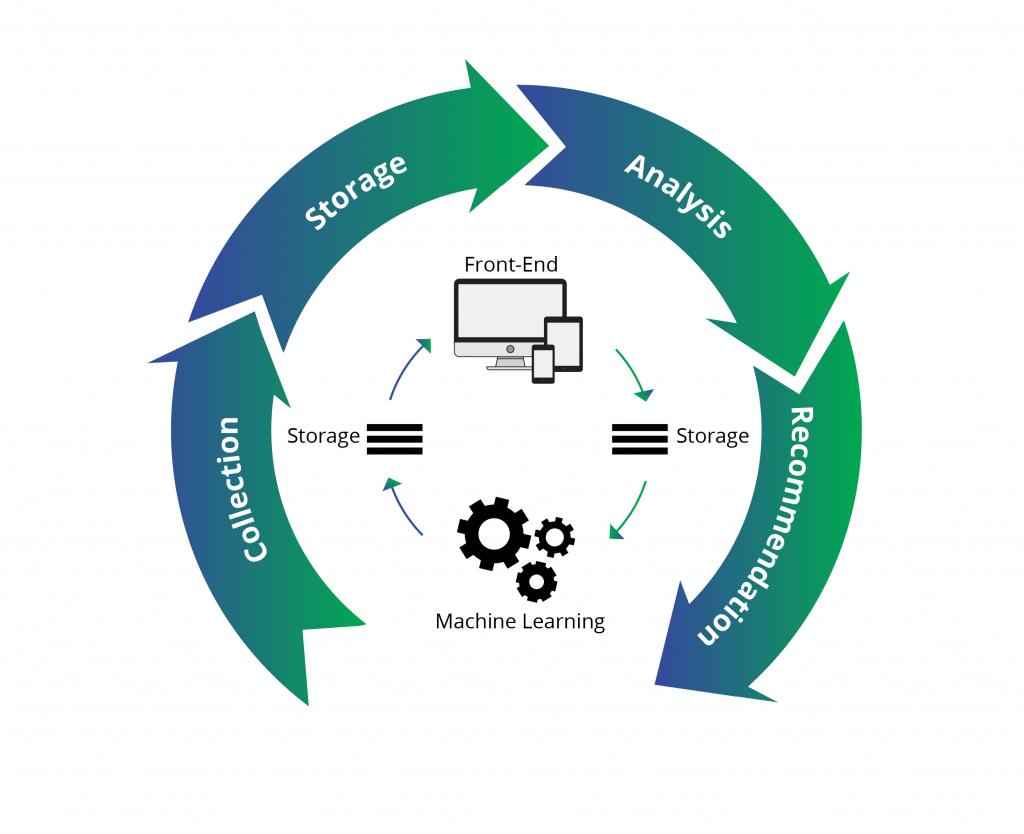
R. J. Mooney & L. Roy (1999) give a perfect explaination of how recommender system work. Please see below: 


> Recommender systems usually make use of either or both collaborative filtering and content-based filtering (also known as the personality-based approach),[8] as well as other systems such as knowledge-based systems. Collaborative filtering approaches build a model from a user's past behavior (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that the user may have an interest in.[9] Content-based filtering approaches utilize a series of discrete, pre-tagged characteristics of an item in order to recommend additional items with similar properties.

Now companies are able to provide customers with more options to purchase products. The purpose of recommender system is to increase the amount of information of information that customers must process before they are able to selct which items they desire to buy. 

Our project is to build a recommendation system for Electronic products on Amazon. 

The graph below will give us clearn understanding of how Amazon recommends other products. We search for 4k HD Webcome and we click on one of them. after scrolling down, It shows the best rating HD Webcams:
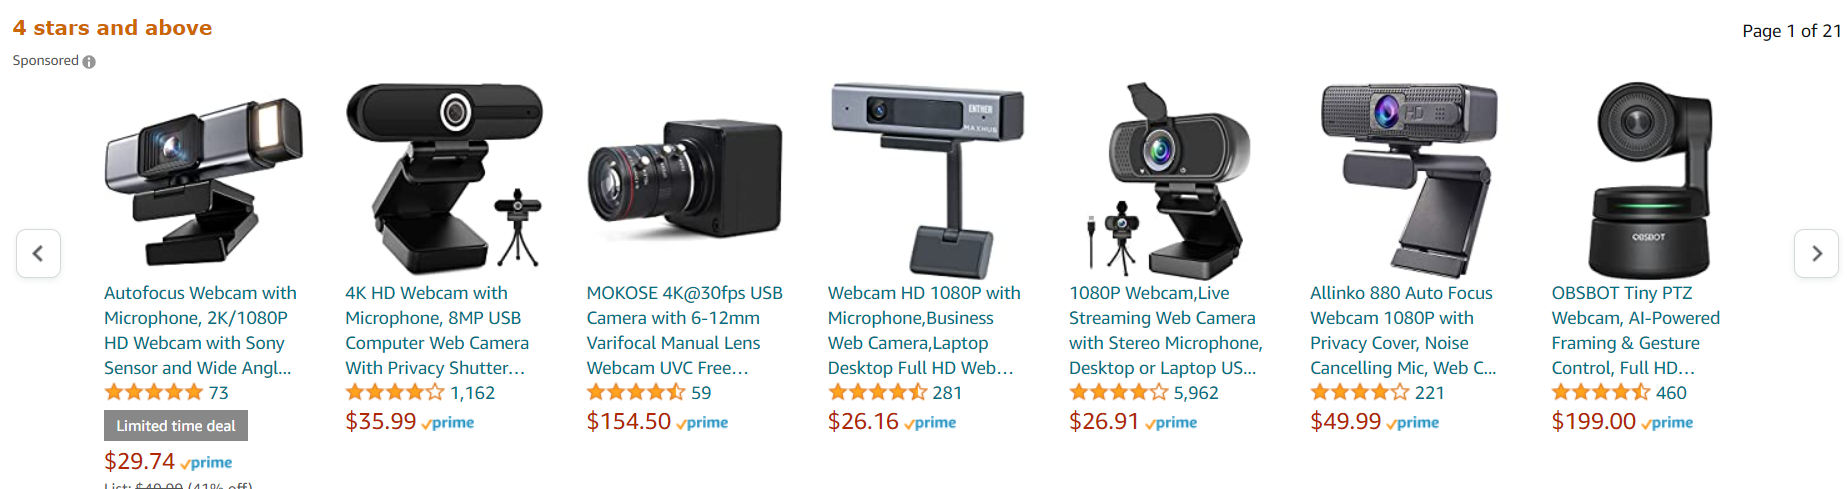


# Source
The source for the project file can be found at this link below: 
http://jmcauley.ucsd.edu/data/amazon/

We are going to use the Electronics datasets only. 

# Steps

1- **Import the data and Extract some information from the dataset.**

2- **Keep only customers that have more then 50 reviews.**

3- **Split the data into target and features and train and test sets.**

4- **Build Popularity Recommendation Model**

5- **Build Collaborative Filtering model.**

6- **Evaluate Both model.**

7- **Get top-  K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.**

8- **Summarise your insights.**



# Import Python Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sn 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\Warner_xxxboa\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# machine learning library use for product recommendation
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

There might be some complications installing `surprise` package. Please use Windows PowerShell type 
> conda install -c conda-forge sckilit-surprise

In [3]:
# Read Json file from AMAZON

df = pd.read_json('Product Recommendations/Electronics_5.json',lines=True,orient='columns')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


Renaming some of the column names to have a better terminology that fits the project

In [4]:
# Renaming 
amazon_df = df.rename(columns= {'reviewerID': 'customerID','asin': 'productID','reviewerName':'custumerName',
                                'overall':'ratings','unixReviewTime':'timestamp',
                               'reviewTime':'customerReviewTime'})
amazon_df.head()

,customerID,productID,custumerName,helpful,reviewText,ratings,summary,timestamp,customerReviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [5]:
# Select import columns for analysis 
data = amazon_df[['customerID','productID','ratings','timestamp']]
data.head()

,customerID,productID,ratings,timestamp
0,AO94DHGC771SJ,0528881469,5,1370131200
1,AMO214LNFCEI4,0528881469,1,1290643200
2,A3N7T0DY83Y4IG,0528881469,3,1283990400
3,A1H8PY3QHMQQA0,0528881469,2,1290556800
4,A24EV6RXELQZ63,0528881469,1,1317254400


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   customerID  1689188 non-null  object
 1   productID   1689188 non-null  object
 2   ratings     1689188 non-null  int64 
 3   timestamp   1689188 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [7]:
# Look at the shape of the dataset
data.shape

(1689188, 4)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,1689188.0,4.222779e+00,1.185632e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,1689188.0,1.340571e+09,6.342451e+07,929232000.0,1.318118e+09,1.360800e+09,1.385078e+09,1.406074e+09


In [9]:
# Dropping the timestand column 
data = data.drop('timestamp', axis=1)
data.head()

,customerID,productID,ratings
0,AO94DHGC771SJ,0528881469,5
1,AMO214LNFCEI4,0528881469,1
2,A3N7T0DY83Y4IG,0528881469,3
3,A1H8PY3QHMQQA0,0528881469,2
4,A24EV6RXELQZ63,0528881469,1


We need to check of missing values and run some explonatory data analysis

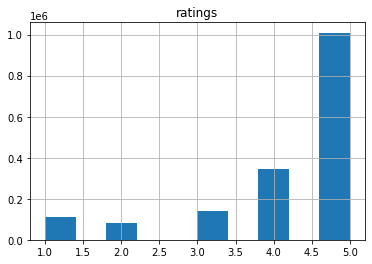

In [10]:
data.hist('ratings', bins = 10);

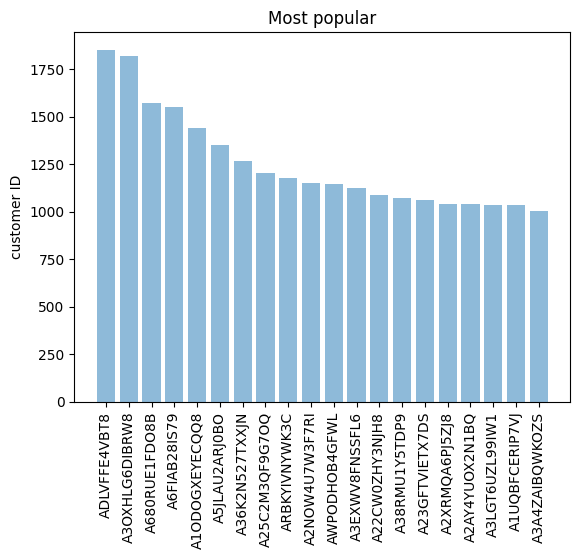

In [11]:
popular = data[['customerID','ratings']].groupby('customerID').sum().reset_index()
popular_20 = popular.sort_values('ratings', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(popular_20['customerID']))
y_pos = np.arange(len(objects))
performance = list(popular_20['ratings'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('customer ID')
plt.title('Most popular')
 
plt.show()

In [13]:
# find unique users 
data.customerID.value_counts()

ADLVFFE4VBT8      431
A3OXHLG6DIBRW8    407
A6FIAB28IS79      367
A680RUE1FDO8B     352
A5JLAU2ARJ0BO     351
                 ... 
AG9X8KKVJA99B       5
A2XMLBREYIEGGG      5
A3NZJXUBW6YEGL      5
A3030L8GMEQD3F      5
A1FQ3HRVXA4A5B      5
Name: customerID, Length: 192403, dtype: int64

In [48]:
# create user EDA function go get some information about 
def cust_info(data): 
    uniqueCustID = len(data['customerID'].unique())
    uniPrctID = len(data['productID'].unique())
    UniRating = data['ratings'].unique()
    min_Rating = data[(data['ratings'] < 2)]
    min_Prod = len(min_Rating['productID'].unique())
    med_Rating = data[(data['ratings']< 2) & (data['ratings']< 4)]
    max_Rating = data[(data['ratings'] >= 4)]
    avg_Rating_prod = data.groupby('productID').sum() / data.groupby('productID').count()
    avg_Rating_prod.drop('customerID',axis=1,inplace=True)
    MaxPr =avg_Rating_prod.nlargest(10,'ratings')
    
    print(f'Number for unique users:  {uniqueCustID}')  
    print(f'Number of unique Products:  {uniPrctID}') 
    print(f'Unique Rating : {UniRating} and  Minimum Rtaing by Products:  {min_Prod}')
    print(f'Number of unique products rated medium: {len(med_Rating.productID.unique())}')
    print(f'Number of unique products rated maximum: {len(max_Rating.productID.unique())}')
    print(f'Top 10 Highly rated products ----------- {MaxPr}')

cust_info(data)
    


Number for unique users:  192403
Number of unique Products:  63001
Unique Rating : [5 1 3 2 4] and  Minimum Rtaing by Products:  33116
Number of unique products rated medium: 33116
Number of unique products rated maximum: 62892
Top 10 Highly rated products -----------/n             ratings
productID          
3930992868      5.0
B00000J1UY      5.0
B00000J1V8      5.0
B00000J3GR      5.0
B00000JDFI      5.0
B00001QEAE      5.0
B0000225BA      5.0
B000023VUE      5.0
B0000303I7      5.0
B000031WCH      5.0


# Data Manipulation of the dataset for Machine Learning

We going to take only customes who make at least 50 ratings or more. 


In [52]:
customerID = data.groupby('customerID').count()
top_customer = customerID[customerID['ratings'] >= 50].index

final_df = data[data['customerID'].isin(top_customer)]
final_df.head()

,customerID,productID,ratings
15,AT09WGFUM934H,0594481813,3
104,A3TAS1AG6FMBQW,0972683275,5
237,A3LDPF5FMB782Z,1400501466,5
244,A2XIOXRRYX0KZY,1400501466,3
281,A3LDPF5FMB782Z,1400501520,5


In [53]:
final_df.shape

(89407, 3)

In [54]:
# Let reorder the ratings 
final_df.sort_values(by='ratings', ascending=False).head()

,customerID,productID,ratings
1689187,A2NYK9KWFMJV4Y,B00LGQ6HL8,5
895724,A2LW5AL0KQ9P1M,B0044UHMOO,5
1614604,A1U11IP6K6NHAK,B00DHAAD6G,5
1614578,AD9ZL63H0VKCZ,B00DH7WP9W,5
895797,A3R4794K2RVU1S,B0044WWLW0,5


# Keep Data Only For Products That Have 50 Or More Ratings

In [55]:
prodID = data.groupby('productID').count()
top_products = prodID[prodID['ratings'] >= 50].index

final_RatedPr = final_df[final_df['productID'].isin(top_products)]
final_RatedPr.sort_values(by='ratings', ascending = False).head()

,customerID,productID,ratings
104,A3TAS1AG6FMBQW,0972683275,5
788541,A3MFORLOKIOEQY,B003L1ZYZ6,5
788676,A2503LT8PZIHAD,B003L1ZYZ6,5
788664,A2EZTM9WY5B5IL,B003L1ZYZ6,5
788663,A1GBT4UN2RW7XY,B003L1ZYZ6,5


In [56]:
final_RatedPr.shape

(43858, 3)

Our final data for Machine Learning (ML) is `final_RatedPr`. We are going to do the data prepraration for ML

In [57]:
from sklearn.model_selection import train_test_split
train_data , test_data = train_test_split(final_RatedPr,test_size = 0.30, random_state=0)


In [58]:
train_data.head()

,customerID,productID,ratings
1032177,A1E55W6ES0FY17,B004UQ05M8,5
132627,A2QI2JHSIQ3SN3,B0006I1TRY,5
665046,A1R377IPZOKLMM,B002UT42UI,5
271106,A3NXJDNTQK2YJL,B000N99BBC,4
1139869,A1VFX417XDNWIU,B005HMCCNE,5


In [59]:
test_data.head()

,customerID,productID,ratings
1335099,A1X1CEGHTHMBL1,B007VPGL5U,5
113352,A353U0L2HAMSHV,B0002L5R78,4
1659642,A25QJBK33C4O0R,B00FFJ0HUE,4
1026861,A3NG7X4APIV649,B004TKTOWC,4
756497,A2XRMQA6PJ5ZJ8,B003DZ1684,5


# Build Popularity Recommender Model

In [60]:
# building the recommmendation based on the average of all users ratings for each report 
train_data_grouped = train_data.groupby('productID').mean().reset_index()
train_data_grouped.head()

,productID,ratings
0,0972683275,5.000000
1,1400532655,2.666667
2,140053271X,4.000000
3,9983891212,5.000000
4,B00000DM9W,5.000000


In [61]:
train_data_sort = train_data_grouped.sort_values(by=['ratings', 'productID'], ascending=False)
train_data_sort.head()

,productID,ratings
5566,B00IDG3IDO,5.0
5559,B00HVLUR86,5.0
5551,B00HNGB1YS,5.0
5550,B00HNFPZF0,5.0
5546,B00HG1L334,5.0


In [64]:
train_data.groupby('productID')['ratings'].count().sort_values(ascending=False).head(10)

productID
B0088CJT4U    139
B00829TIEK    108
B003ES5ZUU    105
B000N99BBC    100
B002R5AM7C     92
B00829THK0     88
B008DWCRQW     85
B004CLYEDC     77
B004T9RR6I     76
B007WTAJTO     76
Name: ratings, dtype: int64

In [65]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productID')['ratings'].mean())

In [66]:
ratings_mean_count['rating_count'] = pd.DataFrame(train_data.groupby('productID')['ratings'].count())

In [67]:
ratings_mean_count.head()

,ratings,rating_count
productID,,
0972683275,5.000000,1
1400532655,2.666667,3
140053271X,4.000000,1
9983891212,5.000000,6
B00000DM9W,5.000000,3


In [71]:
pred_df = test_data[['customerID','productID','ratings']]
pred_df.rename(columns={'ratings': 'true_ratings'}, inplace=True)

In [72]:
pred_df = pred_df.merge(train_data_sort, left_on='productID', right_on='productID')

In [73]:
pred_df.head()

,customerID,productID,true_ratings,ratings
0,A1X1CEGHTHMBL1,B007VPGL5U,5,4.333333
1,A353U0L2HAMSHV,B0002L5R78,4,4.833333
2,A1CYTBE7LLUQ8F,B0002L5R78,5,4.833333
3,A19W47CXJJP1MI,B0002L5R78,5,4.833333
4,A6FIAB28IS79,B0002L5R78,3,4.833333


In [74]:
pred_df.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)

In [75]:
pred_df.head()

,customerID,productID,true_ratings,predicted_ratings
0,A1X1CEGHTHMBL1,B007VPGL5U,5,4.333333
1,A353U0L2HAMSHV,B0002L5R78,4,4.833333
2,A1CYTBE7LLUQ8F,B0002L5R78,5,4.833333
3,A19W47CXJJP1MI,B0002L5R78,5,4.833333
4,A6FIAB28IS79,B0002L5R78,3,4.833333


In [77]:
import sklearn.metrics as metric
from math import sqrt 

MSE = metric.mean_absolute_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print(f'The RMSE value for Popularity Recommender model is {sqrt(MSE)}')

The RMSE value for Popularity Recommender model is 0.8510136005690219


# Build Collaborative Filtering Model

Collaborative filtering uses similarities between users and items simultaneously to provide recommendations. This allows for serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features (Google, 2021).

According to Google developer websites, a recommendation system use training data that  consist of a feedback matrix in which: 
     > Each row represents a user.
Each column represents an item (a movie).
The feedback about movies falls into one of two categories:

Explicit— users specify how much they liked a particular movie by providing a numerical rating.
Implicit— if a user watches a movie, the system infers that the user is interested.
To simplify, we will assume that the feedback matrix is binary; that is, a value of 1 indicates interest in the movie.

When a user visits the homepage, the system should recommend Items based on both:

> similarity to items the user has liked in the past

> Items that similar users liked
    

In [81]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [79]:
reader = Reader(rating_scale=(0.5,5.0))

# converting Pandas DataFrame to Surprise format

In [82]:
data = Dataset.load_from_df(final_RatedPr[['customerID','productID','ratings']], reader)

In [83]:
# Split the data into train and test 
trainset, testset = train_test_split(data, test_size=0.3, random_state=0)

In [84]:
type(trainset)

surprise.trainset.Trainset

In [85]:
# Training The model 
algo_user = KNNWithMeans(k=10, min_k=6,sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [86]:
# SVD
svd_model = SVD(n_factors=50, reg_all=0.02)
svd_model.fit(trainset)

# Model Evaluation
Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [90]:
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print(f'the RMSE for Popularity Recommender model is : {sqrt(MSE)}')

the RMSE for Popularity Recommender model is : 1.0328028497390367


# Collaborative Filtering Recommender Model(RMSE)

In [91]:
print(len(testset))
type(testset)

13158


list

In [92]:
# KNNWithMeans
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid='A26EQ8U96JA92T', iid='B001IOHAVO', r_ui=5.0, est=4.575757575757576, details={'actual_k': 0, 'was_impossible': False})

In [93]:
# Compute RMSE accuracy score 
accuracy.rmse(test_pred)

RMSE: 0.9545


0.9545092572536552

In [99]:
# SVD 
test_pred = svd_model.test(testset)
accuracy.rmse(test_pred)

RMSE: 0.9218


0.9217545413674817

In [94]:
# Parameter tuning using SVD 
param_grid = {"n_factors": [5,10,15], "reg_all": [0.01,0.02]}
gs = GridSearchCV(SVD, param_grid,measures=['rmse'], cv=3,refit=True)

In [95]:
gs.fit(data)

In [96]:
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [97]:
# USe best model for prediction 
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8285


0.828474398513682

The RMSE value for Collaborative Filtering model, byKNNWithMeans is 0.9545 and SVD is 0.9218. After parameter tuning of SVD it is 0.8285

We need to get top fives recommendations based on the customer habits. 
# Precision
> Precision at k is the proportion of recommended items in the top-k set that are relevant

Its interpretation is as follows. Suppose that my precision at 5 in a top-5 recommendation problem is 82%. This means that 82% of the recommendation I make are relevant to the user.
Mathematically precision@k is defined as follows:
Precision@k = (# of recommended items @k that are relevant) / (# of recommended items @k)

In [103]:
from collections import defaultdict
# functions to get top prediction 
def get_top_n(predictions, n=5):
    
    # first map the prediction to each user
    top_n = defaultdict(list)
    for uid,iid, true_r,est, _ in predictions:
        top_n[uid].append((iid,est))
        
    # Then sort the predictions for each users and retreive the k highest ones 
    for uid, customer_ratings in top_n.items():
        customer_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = customer_ratings[:n]
        
    return top_n


In [104]:
top_n = get_top_n(test_pred, n=5)

In [106]:
# Print the recommmended items for each users 
for uid, customer_ratings in top_n.items():
    print(uid,[iid for (iid,_) in customer_ratings])

A26EQ8U96JA92T ['B000BQ7GW8', 'B004HIN7SI', 'B003LVZO8S', 'B001O4EPHA', 'B009SYZ8OC']
A1WF4QNIE2Z3I7 ['B009NB8WR0', 'B005ES0YYA', 'B00BGGDVOO', 'B0093H4WT6', 'B000S5Q9CA']
A31N0XY2UTB25C ['B002WE0QN8', 'B000067RT6', 'B00BQ4F9ZA', 'B004286VMW', 'B00006RVPW']
A1F9Z42CFF9IAY ['B000ODN7VM', 'B00001WRSJ', 'B00009RUCH', 'B004K8WPUQ', 'B001HBHLEY']
A3FFZQKCA7UOYY ['B001TH7T2U', 'B001TH7GUA', 'B0027AGK3M', 'B000OG88KY', 'B00005Y3OM']
A1SHHQSPOWR00F ['B001UI2FPE', 'B0000BZL1P', 'B002V8C3W2', 'B001WM73P0', 'B000HGIWN4']
A1NGFGBX2VCQS8 ['B006EKIQYM', 'B0097BEFYA', 'B001B8CSQ4', 'B009NHWVIA', 'B008HK50ZA']
A2TA40MV2H4O6F ['B0012Y6HC8', 'B00BQ4F9ZA', 'B00007E89K', 'B000AZ57M6', 'B0013FRNKG']
A3284KYDZ00BZA ['B000HPV3RW', 'B00BOHNYTW', 'B00B2HCLL6', 'B005IA843W', 'B00829THK0']
A3QRW0UJPKIAX7 ['B007KZQM8W', 'B008ULPAT2', 'B009WG6JF8', 'B0088CJT4U', 'B002ZV51DI']
A1YEPFLLH42OU1 ['B0052SCU8U', 'B0043WJRRS', 'B000O8I474', 'B005J2E2US', 'B002V88HFE']
A2CIQEY05SPHTZ ['B00829THVO', 'B000O8WE66', 'B0088CJT4

AFR9GYKAHM37U ['B002SIMPXM', 'B0055QYJIS', 'B000051299', 'B000EGQS5G', 'B0000BVYTV']
A2IMLOJ2Z2QEU2 ['B00CYX26BC', 'B008ULPAT2', 'B002VPE1XE', 'B003M0NURK', 'B00D68ZVY8']
A1Z16630QMH8Q6 ['B002K9IHGI', 'B002V88HFE', 'B00BWF5U0M', 'B00EOI2SR2', 'B00634PLTW']
A370XYLIZCSK1Y ['B00077AA5Q', 'B001QUA6RA', 'B004FA8NOQ', 'B00BBD7NFU', 'B002LU80QS']
A11YOTONCPRQ9S ['B00224ZDFY', 'B0071BTJPI', 'B006ZZUK5Y', 'B005CT56F8', 'B005C6CVAE']
A2BLFCOPSMBOZ9 ['B00G4UQ6U8', 'B000N99BBC', 'B005HSG3BA', 'B001TH7GUK', 'B00005T3G0']
ASJSX783R5HTZ ['B008EQZ25K', 'B004RORMF6', 'B0065DUJ0C', 'B006TAP096', 'B001BTCSI6']
A18YMFFJW974QS ['B001T9NUJE', 'B002RM08RE', 'B001MXLD4G', 'B00165XQWW', 'B002RWJD7A']
A2O6HZ2B9YSRXR ['B002VKVZ1A', 'B002UVNW5W', 'B0053OLY9O', 'B001TH7GUK', 'B004FA8NOQ']
A357B3PUHSVQA ['B007PJ4P4G', 'B00FJWKYYG', 'B005A0B7CA', 'B0045BLP1S', 'B000CSQJ8C']
A1MQQEM7W77L62 ['B003ES5ZUU', 'B008LTBITY', 'B00006IW1X', 'B009UEAZ84', 'B002TLTIS8']
A2V5M5EJPOD2IU ['B00D5Q75RC', 'B004G6002M', 'B001T9NUJE',

We have read and analyze the dataset. We only used the first Three columns and change them to better fit the project. 
> **We build Popularity Recommender model and found the RMSE value for Popularity Recommender model as 1.032
 and created the Collaborative Filtering model.The RMSE value for Collaborative Filtering model, byKNNWithMeans is 0.9545 and SVD is 0.9218. After parameter tuning of SVD it is 0.8285**
 
The purpose of this project was to recommend new products to each users based on their habits of purchasing.**Collaborative fitering fares better with 0.83 scores.** Collaborative filtering uses user's behaviour (in this case explicit ratings to give) similar items / similar users and recomend products accordingly. Popularity based algorithm have their used cases when user would just like to browse most popular items


